# Ejercicio 4.1.5 Bike Sharing Daily, Regression, Gradient Descent, Overfitting

El modelo de regresión es un procedimiento estadístico que permite al investigador estimar la relación linel que relacion dos o más variables.

- El algoritmo de programacion para implementar el modelo de regresión lineal es el siguiente: 

    1. Cargar el dataset, normalizar y dividir los datos en datos de entrenamiento y datos de prueba, añadir la columna de unos para w0.
    2. Inicializar W, y calcular el gradiente de W
    3. Mientras el gradiente sea más grande que epsilon, calcular:
        - El gradiente para el valor actual de W
        - Actualizar el valor para el siguiente W
        - Cacular el costo y almacenarlo en una variable
    4. Obtener la función de costo o error para el último valor de W
    5. Predecir la salida con los datos de prueba y obtener el valor del error. 

- Para comprobar el Overfitting realizar el algoritmo de GD con 9 tamaños de datos de prueba: 0.1, 0.2,..., 0.9, y graficar el costo.

- ¿Con qué tamaño de prueba (test_size) tendremos overfitting y con cuál underfiting?
- Finalmente utilizar el test size que se eligió y hacer regresión polinomial de grado 1 al 5 y graficar el comportamiento del costo.

## 1. Cargar el dataset, normalizar y dividir los datos en datos de entrenamiento y datos de prueba, añadir la columna de unos para w0.

Para este caso utilizaremos los datos del ejercicio de las Bicis, el dataset de horas. 

In [19]:
#Import libraries
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy.linalg import norm
from numpy.random import rand
import math
from sklearn.preprocessing import StandardScaler

In [20]:
#1. Load the dataset and convert to numpy arrays

def loadCsv(filename):
    data = pd.read_csv(filename)
    dataset = np.array(data)
    m, n = np.shape(dataset)
    x = dataset[:, 0:n-1]
    y = dataset[:, -1]
    y = np.reshape(y ,(m,1))
    
    return x, y

#Testing
filename = 'bike-day.csv'
x, y = loadCsv(filename)
print('X size:',np.shape(x), 'Y size:',  np.shape(y))

X size: (731, 11) Y size: (731, 1)


In [21]:
# Definir funciones

def addOnes(X):
    X1 = np.array(X)
    m, n = np.shape(X1)
    ones = np.ones((m, 1))
    X1 = np.concatenate((ones, X1), axis=1)
    return X1


def mse(Y, Yt):
    residual = Y - Yt
    cost = np.dot(residual.T, residual) / len(Y)
    return cost


def gradient(X, Y, W):
    residual = Y - np.dot(X, W.T)
    grad = -2 * np.dot(X.T, residual)
    return grad


def GD(X, Y, W, alpha, epsilon, iterations):
    grad = gradient(X, Y, W)
    gradNorm = np.linalg.norm(grad)
    Yt = np.dot(X, W.T)
    cost = mse(Y, Yt)
    it = 0
    # Lista donde guardaremos el valor del error (MSE) en cada iteración
    J = []

    while gradNorm > epsilon and it < iterations:

        # calcular gradiente
        grad = gradient(X, Y, W)
        gradNorm = np.linalg.norm(grad)

        # Actualizar W
        W = W - alpha * grad.T

        # Incrementar contador de iteraciones
        it += 1

        # Calcular la predicción y el error (MSE)
        Yt = np.dot(X, W.T)
        cost = mse(Y, Yt)

        # Guardar el vector del error
        J.append(float(cost))

    return W, it, J


In [22]:
# Escalar X

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [23]:
# paso 4

testsize = np.arange(0.1, 1, 0.1)

print(testsize)


[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [24]:
# paso 5. iniciazar variables
alpha = 0.0001
epsilon = 0.01
itera = 100000
costosTraining = [] 
costosTesting = []

# paso 6 para cada tamaño de test size
for tsize in testsize:
    #split dataset
    xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = tsize , random_state = 0)

    #añadir 1s a xTrain y xTest
    xTr = addOnes(xTrain)
    xTe = addOnes(xTest)

    #inicializar w de forma aleatoria
    m,n = np.shape(xTr)
    init_w = np.random.rand(1,n)

    print("Testsize: ", tsize)

    #GD
    w, iterations, J = GD(xTr, yTrain, init_w, alpha, epsilon, itera)

    #calcular costos
    cTr = mse(yTrain, np.dot(xTr, w.T)) #testing
    cTe = mse(yTest, np.dot(xTe, w.T))

    print("Training cost:", cTr)
    print("Training cost:", cTe)


    #Guardar en listas de costos 
    costosTraining.append(cTr)
    costosTesting.append(cTe)


Testsize:  0.1
Training cost: [[736048.03528628]]
Training cost: [[876272.98543673]]
Testsize:  0.2
Training cost: [[733745.88857631]]
Training cost: [[831250.90683429]]
Testsize:  0.30000000000000004
Training cost: [[746827.55171944]]
Training cost: [[780473.83513267]]
Testsize:  0.4
Training cost: [[715532.3331936]]
Training cost: [[834805.55354166]]
Testsize:  0.5
Training cost: [[742452.69246831]]
Training cost: [[791084.75033799]]
Testsize:  0.6
Training cost: [[732512.56381877]]
Training cost: [[812011.66269108]]
Testsize:  0.7000000000000001
Training cost: [[626687.99437567]]
Training cost: [[849850.13963803]]
Testsize:  0.8
Training cost: [[678242.3690894]]
Training cost: [[851912.56134752]]
Testsize:  0.9
Training cost: [[716465.57001976]]
Training cost: [[909703.58183992]]


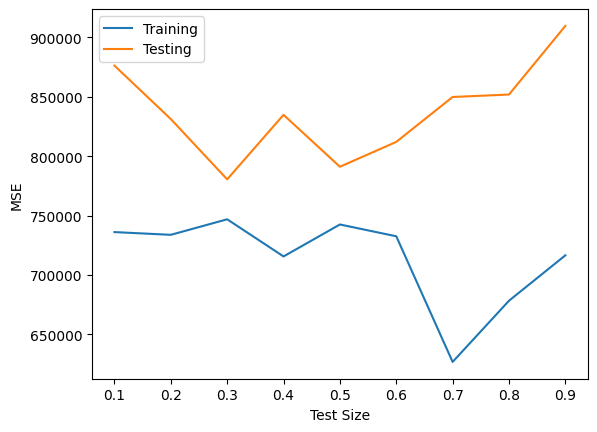

In [25]:
# paso 7

costosTraining = np.array(costosTraining)
costosTesting = np.array(costosTesting)

costosTraining = costosTraining.reshape(-1,1)
costosTesting = costosTesting.reshape(-1,1)

plt.plot(testsize,costosTraining, label = 'Training')
plt.plot(testsize,costosTesting, label = 'Testing')

plt.xlabel('Test Size')
plt.ylabel('MSE')

plt.legend()


## 2. Inicializar W, y calcular el gradiente de W


El gradiente es: $$ \nabla J(W) = \frac{\partial J(W) }{\partial W} = \frac{\partial}{\partial W} (Y - XW)^2 = -2X(Y-XW)$$

## 3. Iteración del Gradiente Descendente 

    Mientras la norma del gradiente sea más grande que epsilon, calcular:
    
       - El gradiente para el valor actual de W
       - Actualizar el valor siguiente de W
       - Almacenar el valor del error o del costo para ese W


Primero definiremos la función que evalua el error utilizando MSE: $$MSE(w) = \frac{1}{N} \sum_{i=1}^{N} (y_i - x_i w)^2$$

## 4. Medir el MSE del algoritmo



## 5. Predecir los datos de prueba y calcular su error

## 6. Overfitting y Underfitting

## 7. Add Polynomial features

- Para observar el Underfitting y el Overfitting de estos datos hacer un modelo para cada grado polinomial hasta grado 5.  

    - Prueba 1: $ X = [x]$
    - Prueba 2: $ X = [x \quad x^2]$
    - Prueba 3: $ X = [x \quad x^2 \quad x^3]$
    - Prueba 4: $ X = [x \quad x^2 \quad x^3 \quad x^4]$
    - Prueba 5: $ X = [x \quad x^2 \quad x^3 \quad x^4 \quad x^5]$

- De cada prueba obtener sus W's correspondientes y su error MSE (Costo)

- Graficar el MSE de cada prueba con respecto al grado utilizado



X size: (731, 11) Y size: (731, 1)
Grade: 1
W:  (1, 12)
Iteraciones: 1000000
Training cost: [[7452305.65551837]]
Testing cost: [[6872217.12832819]]
Grade: 2
W:  (1, 23)
Iteraciones: 1000000
Training cost: [[6989468.96986383]]
Testing cost: [[6716938.83769469]]
Grade: 3
W:  (1, 34)
Iteraciones: 1000000
Training cost: [[2978948.32982242]]
Testing cost: [[3958420.47931381]]
Grade: 4
W:  (1, 45)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Iteraciones: 1000000
Training cost: [[3388068.45503536]]
Testing cost: [[4261334.13750764]]


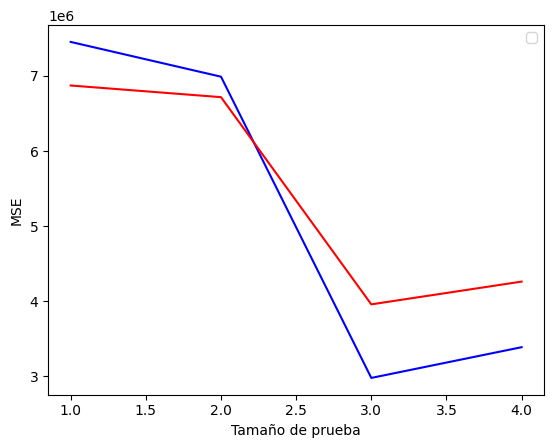

In [26]:
# Incializar parámetros
#Learning rate o índice de aprendizaje pasito tun 
alpha = 0.0000000001
#Precisión (qué tan cercano a cero debe estar el error) margen de error permitido
epsilon = 0.01
#Número máximo de iteraciones (es útil para que el algoritmo no se cicle)
itera = 1000000

#lista de costos para cada prueba 
costosTraining = [] 
costosTesting = []

#nuevas variables

#Random 
seed = 1

#elegir el testsize con menor error
testsize = 0.3

#variable para formar matrices polinomiales
xtemp = x

#Grados que voy a evaluar del 1-5
poly = range(1,5)

filename = 'bike-day.csv'
x, y = loadCsv(filename)
print('X size:',np.shape(x), 'Y size:',  np.shape(y))

# Para cada grado polinomial realizar el gradiente descendente, obtener W's y calcular el MSE (error o costo)
for grade in poly:
    print('Grade:', grade)

    if grade == 1:
        xtemp = x
    else:
        xtemp = np.concatenate((xtemp, x**(grade)),axis =1)
    # Añadir unos a la matriz polinomial
    x_1s = addOnes(xtemp)
    
    # Split dataset en Training and Testing
    xTrain, xTest, yTrain, yTest = train_test_split(x_1s, y, test_size = tsize , random_state = seed)
    yTrain = yTrain.reshape(-1,1)
    yTest = yTest.reshape(-1,1)
    
    # Incializar W de forma aleatoria
    m,n = np.shape(xTrain)
    init_w = np.random.rand(1,n)

    print('W: ',init_w.shape)

    # Obtener W y el error MSE (J) a través del GD
    w, it, J = GD(xTrain, yTrain, init_w, alpha, epsilon, itera)
    
    #Imprimir la iteración it
    print('Iteraciones:', it)
    
    #Calcular errores MSE de Training y Testing  
    cTr = mse(yTrain, np.dot(xTrain, w.T)) #testing
    cTe = mse(yTest, np.dot(xTest, w.T))
    
    print("Training cost:", cTr)
    print("Testing cost:", cTe)

    #Guardar en listas de costos 
    costosTraining.append(cTr)
    costosTesting.append(cTe)

#Convertir a arrays las listas
costosTraining = np.array(costosTraining)
costosTesting = np.array(costosTesting)

#Adecuar dimensiones
costosTraining = costosTraining.reshape(len(costosTraining), 1)
costosTest = costosTesting.reshape(len(costosTesting), 1)


##Graficar los errores con respecto al grado
plt.plot(poly, costosTraining, 'b')
plt.plot(poly, costosTest, 'r')



plt.xlabel('Tamaño de prueba')
plt.ylabel('MSE')
plt.legend()



(658,)
(658,)
          Y        Ypred
0    3830.0  2261.593410
1    2114.0  1573.200836
2    3915.0  5626.078985
3    4322.0   684.124582
4    6591.0  2928.653033
..      ...          ...
653  7359.0  6502.670833
654  5062.0  2264.442114
655  5041.0  4663.090432
656  7691.0  5699.040448
657  3767.0  5623.610250

[658 rows x 2 columns]
          Y        Ypred
201    22.0  5086.424461
388   441.0  1041.867714
146   623.0  3013.627260
136   627.0  6948.605234
168   683.0   741.427478
..      ...          ...
65   8294.0  4940.544675
131  8362.0  3566.218018
306  8395.0  7607.939319
344  8555.0  7386.009972
408  8714.0  7605.306822

[658 rows x 2 columns]
[ 5.08642446e+03  1.04186771e+03  3.01362726e+03  6.94860523e+03
  7.41427478e+02  1.03269560e+03 -2.61309370e+02  4.25525202e+03
  3.29090674e+02  2.18093457e+02 -3.55092495e+00  2.23364663e+03
  2.34764337e+03  4.09921743e+02  2.65888901e+03  2.90432262e+02
  2.28672015e+03  2.22409378e+02  2.23819706e+03  7.23229610e+02
  7.55705763e

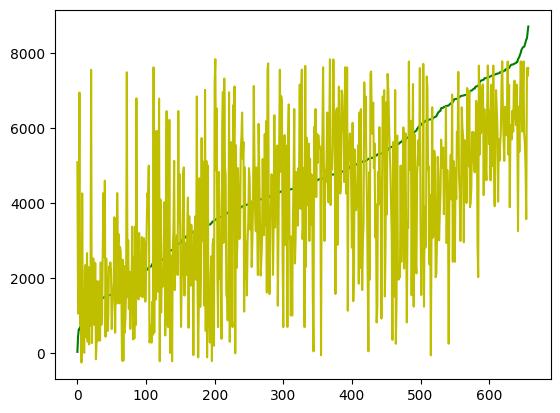

In [27]:
predTest = np.dot(xTest, w.T)
pT = predTest.reshape(len(predTest))
print(pT.shape)
yT = yTest.reshape(len(yTest))
print(yT.shape)
Ys = np.column_stack((yT,pT))
#print(Ys)
df_Ys = pd.DataFrame(data = Ys, columns = ['Y', 'Ypred'])
print(df_Ys)
df1 = df_Ys.sort_values(by=['Y'], ascending=True)
print(df1)
y1 = np.array(df1['Y'])
y2 = np.array(df1['Ypred'])
print(y2)
plt.plot(y1, 'g')
plt.plot(y2, 'y')
#plt.plot(y1,y2)

## Conclusiones

Escribir conclusiones y observaciones del ejercicio.